In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
flight_df = pd.read_csv("flights_historical/train_1.csv")

# reformat departure_time
flight_df['departure_time'] = flight_df['departure_time'].apply(str).apply(lambda x: '0'+x if len(x) != 4 else x)

# reformat the dates
flight_df['month'] = flight_df['month'].apply(lambda x: '0'+x[2:] if len(x) != 4 else x[2:])
flight_df['day_of_month'] = flight_df['day_of_month'].apply(lambda x: '0'+x[2:] if len(x) != 4 else x[2:])
flight_df['day_of_week'] = flight_df['day_of_week'].apply(lambda x: x[2:])
# flight_df['day_name'] = flight_df['day_of_week'].apply(lambda x: days_dict[int(x)])
# flight_df['date'] = flight_df['month'] + flight_df['day_of_month'] + flight_df['departure_time']
# flight_df['date'] = pd.to_datetime(flight_df['date'], format = '%m%d%H%M', errors='coerce') 
flight_df['is_delayed'] = flight_df['is_delayed'].astype('category').cat.codes

flight_df[['departure_time', 'month', 'day_of_month', 'day_of_week']] = flight_df[['departure_time', 'month', 'day_of_month', 'day_of_week']].apply(pd.to_numeric)

flight_df

,unique_carrier,origin,destination,is_delayed,departure_time,month,day_of_month,day_of_week,distance
0,RQ,ULX,TVQ,0,1143,12,16,5,1587
1,C6,URX,DIE,0,2356,3,22,3,2454
2,WT,HSR,VWP,1,2012,1,14,5,1437
3,NB,UGR,CNY,0,1626,10,14,6,328
4,WT,HTE,RJB,0,1112,5,18,3,957
...,...,...,...,...,...,...,...,...,...
89995,WP,ULQ,MQV,0,2056,6,20,1,448
89996,OZ,FSS,QFT,0,630,12,16,6,618
89997,AG,FPH,MQV,0,1525,1,31,2,83
89998,JG,TVQ,TCA,0,1310,12,6,2,146


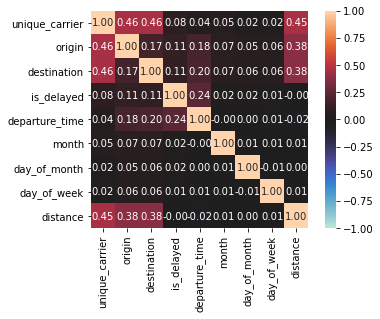

{'corr':                 unique_carrier    origin  destination  is_delayed  \
 unique_carrier        1.000000  0.459214     0.459348    0.078161   
 origin                0.459214  1.000000     0.165416    0.111369   
 destination           0.459348  0.165416     1.000000    0.105188   
 is_delayed            0.078161  0.111369     0.105188    1.000000   
 departure_time        0.044093  0.181132     0.196723    0.243728   
 month                 0.052153  0.070029     0.070012    0.017121   
 day_of_month          0.015206  0.053808     0.057479    0.024551   
 day_of_week           0.020999  0.059347     0.058928    0.010713   
 distance              0.454055  0.378227     0.378060   -0.003695   
 
                 departure_time     month  day_of_month  day_of_week  distance  
 unique_carrier        0.044093  0.052153      0.015206     0.020999  0.454055  
 origin                0.181132  0.070029      0.053808     0.059347  0.378227  
 destination           0.196723  0.070012      

In [3]:
from dython.nominal import associations
associations(flight_df)

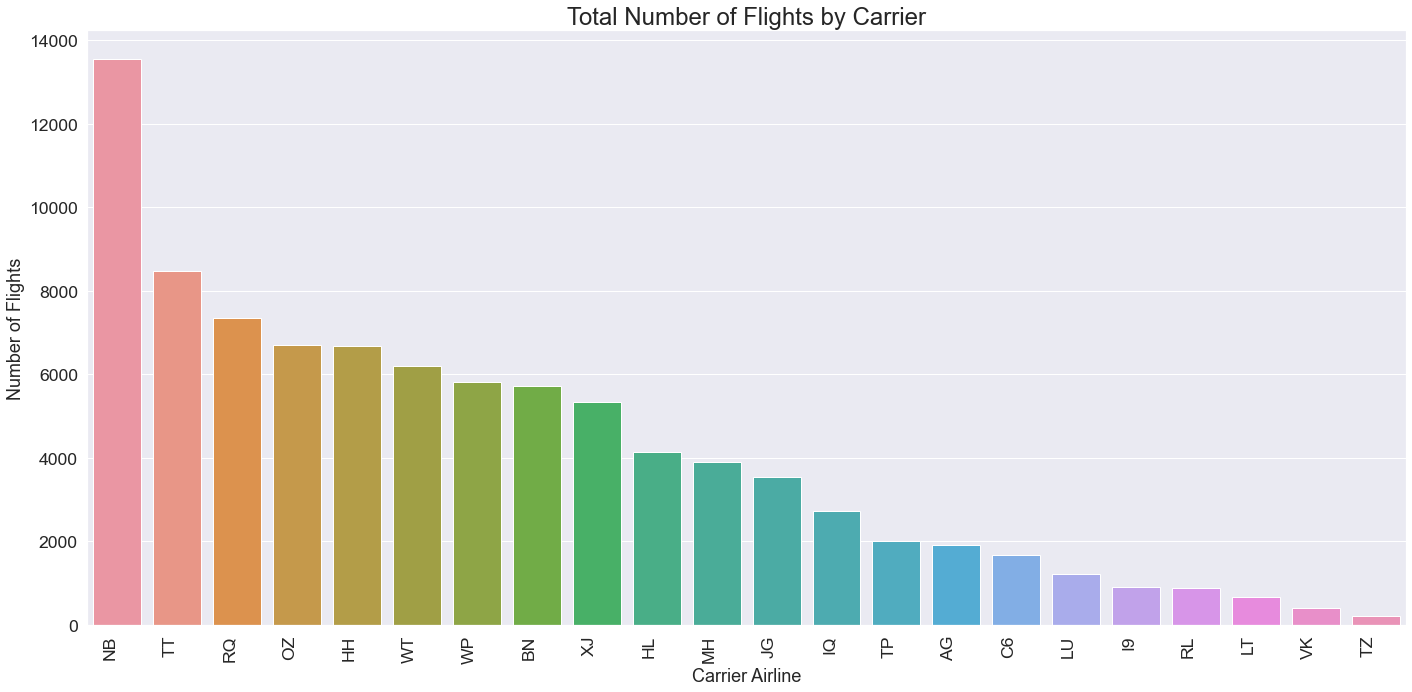

In [4]:
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

df1 = flight_df.copy()

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['unique_carrier'], data=df1, order=df1['unique_carrier'].value_counts().index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Total Number of Flights by Carrier', fontsize=24)
plt.xlabel('Carrier Airline', fontsize=18)
plt.ylabel('Number of Flights', fontsize=18)
plt.tight_layout()
plt.savefig('graphs/totalnumberofflights.png')
plt.show()

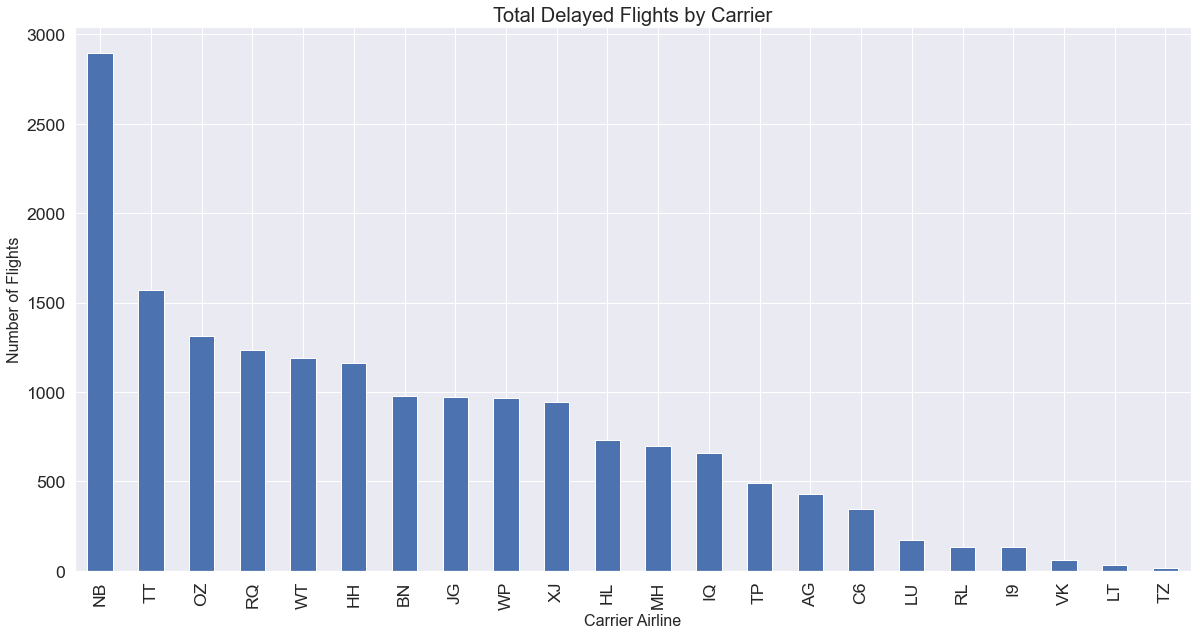

In [5]:
plt.figure(figsize=(20, 10))
df1.groupby('unique_carrier').is_delayed.sum().sort_values(ascending=False).plot.bar()
plt.title('Total Delayed Flights by Carrier', fontsize=20)
plt.xlabel('Carrier Airline', fontsize=16)
plt.ylabel('Number of Flights', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.savefig('graphs/totaldelayedflights.png')
plt.show()

In [6]:
df1.is_delayed.value_counts(normalize=True)

0    0.809556
1    0.190444
Name: is_delayed, dtype: float64

In [7]:
# delay percentage
df_delay_percent = df1[['unique_carrier', 'is_delayed']]
df_delay_percent.is_delayed.value_counts()

0    72860
1    17140
Name: is_delayed, dtype: int64

In [8]:
temp_df1 = df_delay_percent.groupby(['unique_carrier']).sum().reset_index()
temp_df2 = df1.unique_carrier.value_counts().rename_axis('unique_carrier').reset_index(name='total_flights')

temp_merge = pd.merge(temp_df1, temp_df2, on = 'unique_carrier')
temp_merge['delay_percentage'] = round((temp_merge['is_delayed']*100)/temp_merge['total_flights'],2)

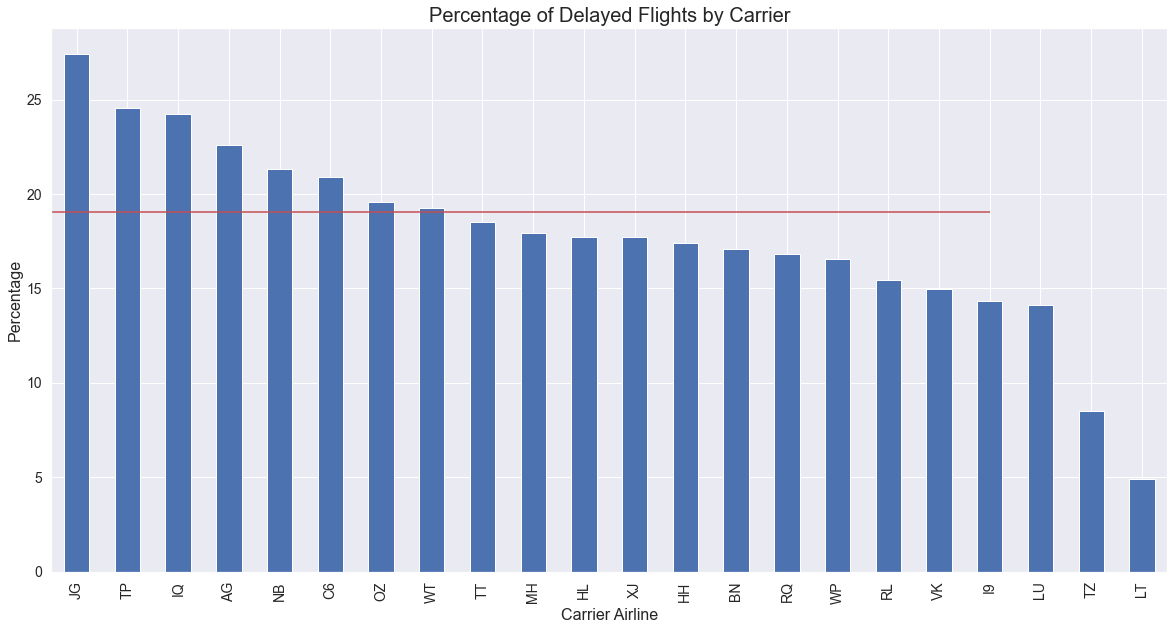

In [9]:
plt.figure(figsize=(20, 10))
temp_merge.groupby('unique_carrier').delay_percentage.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=19.04, xmin=-1, xmax=18, colors='r', linestyles='solid', label='cutoff')
plt.title('Percentage of Delayed Flights by Carrier', fontsize=20)
plt.xlabel('Carrier Airline', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.savefig('graphs/delayedpercentage.png')
plt.show()

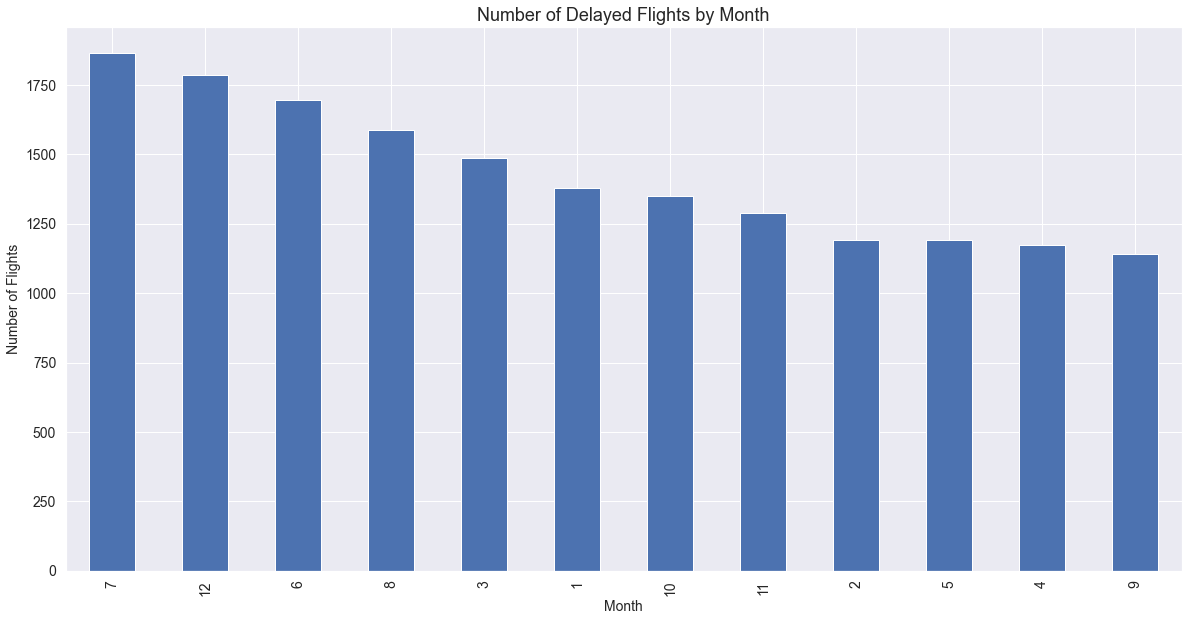

In [10]:
plt.figure(figsize=(20, 10))
df1.groupby('month').is_delayed.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights by Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.savefig('graphs/delayedbymonth.png')
plt.show()

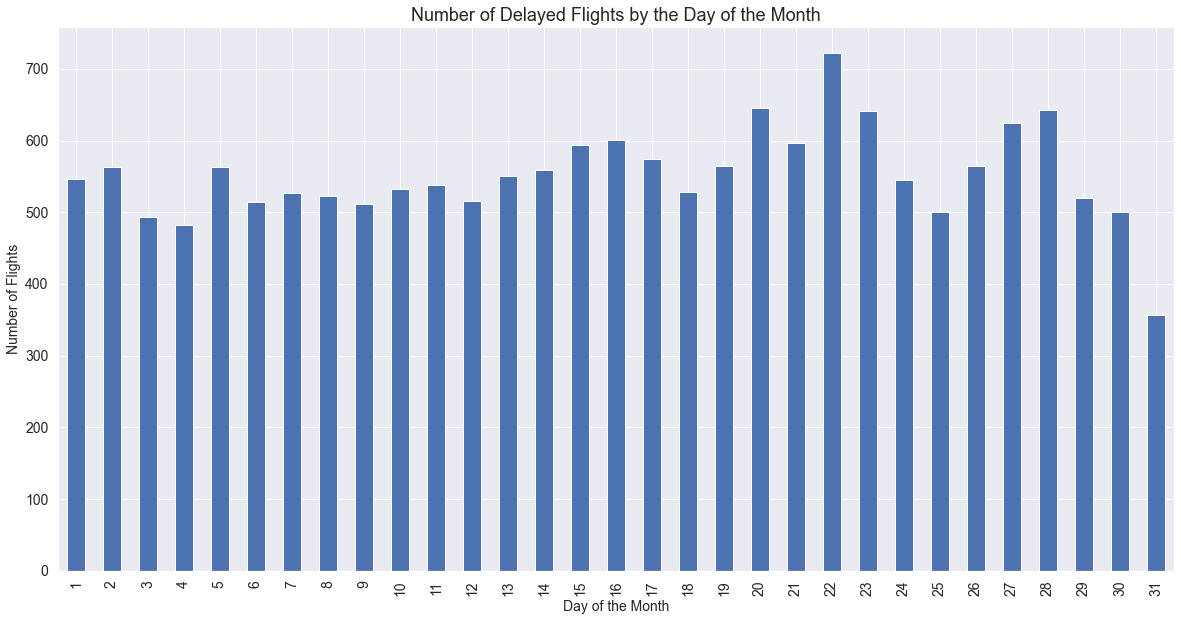

In [11]:
plt.figure(figsize=(20, 10))
df1.groupby('day_of_month').is_delayed.sum().plot.bar()
plt.title('Number of Delayed Flights by the Day of the Month', fontsize=18)
plt.xlabel('Day of the Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.savefig('graphs/delayedbyday.png')
plt.show()

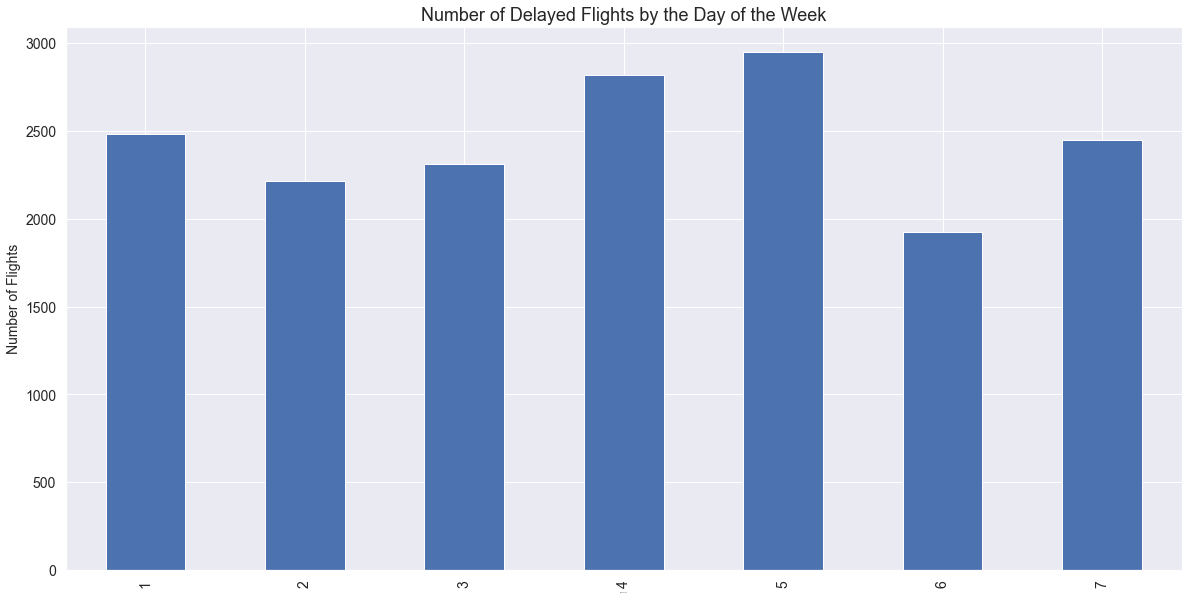

In [12]:
plt.figure(figsize=(20, 10))
df1.groupby('day_of_week').is_delayed.sum().plot.bar()
plt.title('Number of Delayed Flights by the Day of the Week', fontsize=18)
plt.xlabel('Day of the Week', fontsize=1)
plt.ylabel('Number of Flights', fontsize=14)
plt.savefig('graphs/delayedbyweekday.png')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1440x720 with 0 Axes>

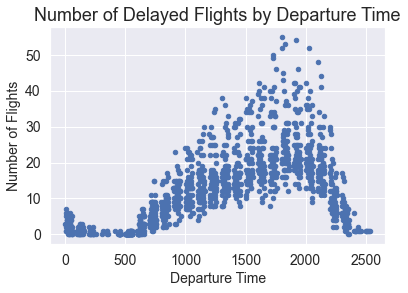

In [13]:
plt.figure(figsize=(20,10))
df1.groupby('departure_time').is_delayed.sum().reset_index().plot.scatter(x='departure_time', y='is_delayed')
plt.title('Number of Delayed Flights by Departure Time', fontsize=18)
plt.xlabel('Departure Time', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.savefig('graphs/delayedbytime.png')
plt.show()

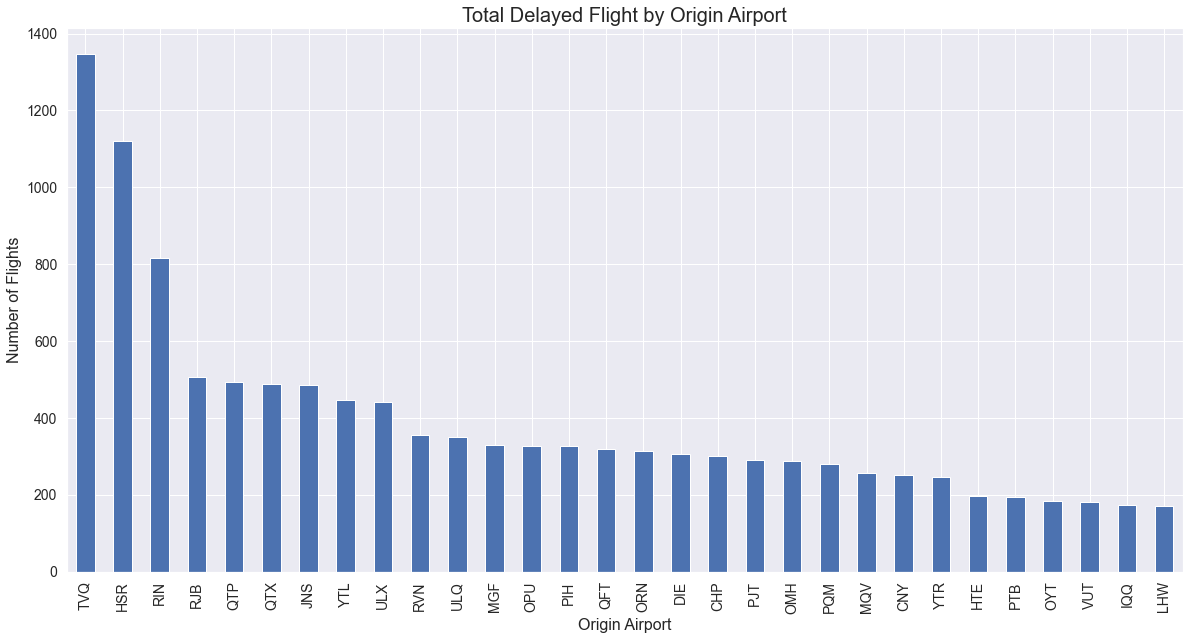

In [14]:
plt.figure(figsize=(20, 10))
df1.groupby('origin').is_delayed.sum().sort_values(ascending=False).head(30).plot.bar()
plt.title('Total Delayed Flight by Origin Airport', fontsize=20)
plt.xlabel('Origin Airport', fontsize=16)
plt.ylabel('Number of Flights', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.savefig('graphs/delayedbyorigin.png')
plt.show()

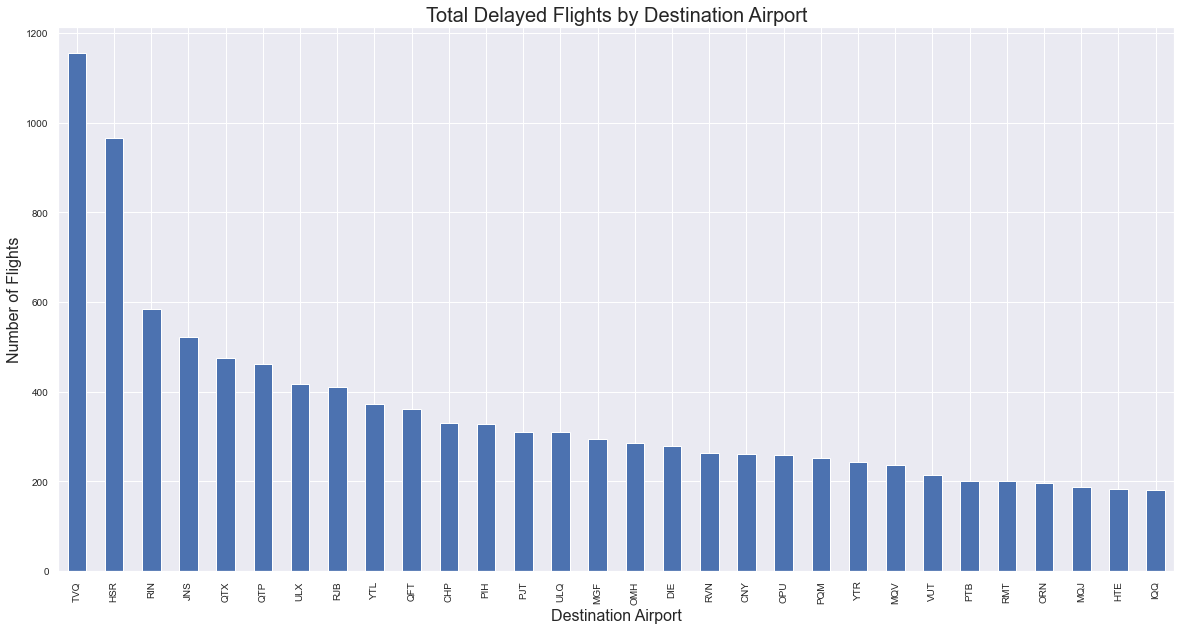

In [15]:
plt.figure(figsize=(20, 10))
df1.groupby('destination').is_delayed.sum().sort_values(ascending=False).head(30).plot.bar()
plt.title('Total Delayed Flights by Destination Airport', fontsize=20)
plt.xlabel('Destination Airport', fontsize=16)
plt.ylabel('Number of Flights', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.savefig('graphs/delayedbydestination.png')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1440x720 with 0 Axes>

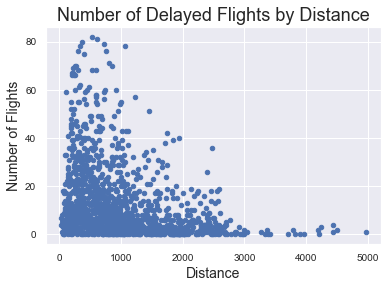

In [16]:
plt.figure(figsize=(20,10))
df1.groupby('distance').is_delayed.sum().reset_index().plot.scatter(x='distance', y='is_delayed')
plt.title('Number of Delayed Flights by Distance', fontsize=18)
plt.xlabel('Distance', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.savefig('graphs/delayedbydistance.png')
plt.show()